In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Inearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


len(cities)

604

In [4]:

city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("This isn't the city you're looking for...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : mahebourg
Processing Record 2 of Set 1 : arraial do cabo
Processing Record 3 of Set 1 : ogaminana
Processing Record 4 of Set 1 : hilo
Processing Record 5 of Set 1 : coquimbo
Processing Record 6 of Set 1 : victoria
Processing Record 7 of Set 1 : caravelas
Processing Record 8 of Set 1 : manaure
Processing Record 9 of Set 1 : khandbari
Processing Record 10 of Set 1 : sept-iles
Processing Record 11 of Set 1 : tucurui
Processing Record 12 of Set 1 : cidreira
Processing Record 13 of Set 1 : punta arenas
Processing Record 14 of Set 1 : bosaso
Processing Record 15 of Set 1 : olafsvik
Processing Record 16 of Set 1 : lasa
Processing Record 17 of Set 1 : dikson
Processing Record 18 of Set 1 : naze
Processing Record 19 of Set 1 : doclin
Processing Record 20 of Set 1 : boguchany
Processing Record 21 of Set 1 : tabat
Processing Record 22 of Set 1 : buala
This isn't the city you're looking for...
Processing Record 

Processing Record 20 of Set 4 : nuevo progreso
Processing Record 21 of Set 4 : wagga wagga
Processing Record 22 of Set 4 : miyako
Processing Record 23 of Set 4 : gizo
Processing Record 24 of Set 4 : muriae
Processing Record 25 of Set 4 : sibiti
Processing Record 26 of Set 4 : filingue
Processing Record 27 of Set 4 : princeton
This isn't the city you're looking for...
Processing Record 28 of Set 4 : fonte boa
Processing Record 29 of Set 4 : husavik
Processing Record 30 of Set 4 : nur
Processing Record 31 of Set 4 : jalu
Processing Record 32 of Set 4 : vila franca do campo
Processing Record 33 of Set 4 : ahipara
Processing Record 34 of Set 4 : jiayuguan
Processing Record 35 of Set 4 : mantua
Processing Record 36 of Set 4 : mamallapuram
Processing Record 37 of Set 4 : padang
Processing Record 38 of Set 4 : ha tinh
Processing Record 39 of Set 4 : nelson bay
Processing Record 40 of Set 4 : mount gambier
Processing Record 41 of Set 4 : castro
Processing Record 42 of Set 4 : kavaratti
Process

Processing Record 0 of Set 8 : camacari
This isn't the city you're looking for...
This isn't the city you're looking for...
This isn't the city you're looking for...
Processing Record 1 of Set 8 : panzhihua
Processing Record 2 of Set 8 : zhezkazgan
Processing Record 3 of Set 8 : ambon
Processing Record 4 of Set 8 : margate
Processing Record 5 of Set 8 : levittown
Processing Record 6 of Set 8 : cam ranh
Processing Record 7 of Set 8 : jurmala
Processing Record 8 of Set 8 : sfantu gheorghe
Processing Record 9 of Set 8 : lompoc
Processing Record 10 of Set 8 : pangnirtung
Processing Record 11 of Set 8 : boa vista
Processing Record 12 of Set 8 : port-gentil
Processing Record 13 of Set 8 : huarmey
Processing Record 14 of Set 8 : pierre
Processing Record 15 of Set 8 : buraydah
This isn't the city you're looking for...
Processing Record 16 of Set 8 : hastings
Processing Record 17 of Set 8 : santa vitoria do palmar
Processing Record 18 of Set 8 : emerald
Processing Record 19 of Set 8 : codringto

Processing Record 26 of Set 11 : tiznit
Processing Record 27 of Set 11 : chapleau
Processing Record 28 of Set 11 : warrnambool
Processing Record 29 of Set 11 : shasta lake
Processing Record 30 of Set 11 : marrakesh
Processing Record 31 of Set 11 : qaqortoq
Processing Record 32 of Set 11 : nikel
-----------------------------
Data Retrieval Complete
-----------------------------


In [20]:
weather = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})
weather.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mahébourg,75,MU,1614818133,94,-20.4081,57.7000,24.00,1.03
1,Arraial do Cabo,0,BR,1614818037,83,-22.9661,-42.0278,25.00,6.17
2,Ogaminana,68,NG,1614818134,75,7.5946,6.2248,24.36,2.19
3,Hilo,1,US,1614817993,44,19.7297,-155.0900,26.00,5.14
4,Coquimbo,75,CL,1614817998,88,-29.9533,-71.3436,17.00,3.60


In [21]:
# Count data
weather.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [22]:
weather.to_csv(output_data_file)

## Latitude vs. Temperature Plot

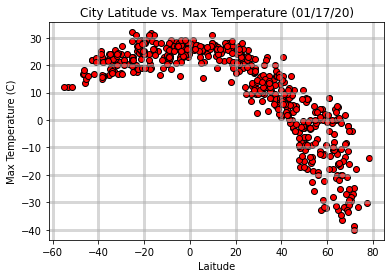

In [23]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather["Lat"], weather["Max Temp"], facecolor = "RED", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (C)")

# Set grid line
plt.grid(linestyle='-', linewidth=3, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

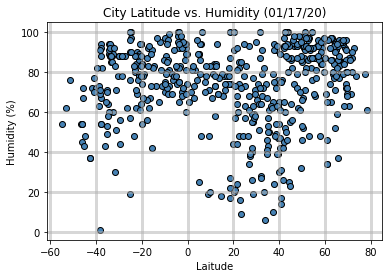

In [24]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather["Lat"], weather["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=3, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

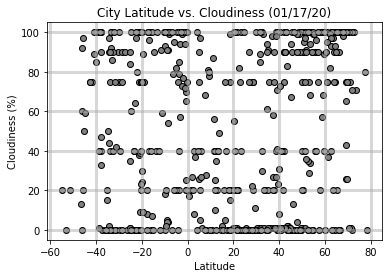

In [25]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather["Lat"], weather["Cloudiness"], facecolor = "grey", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=3, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

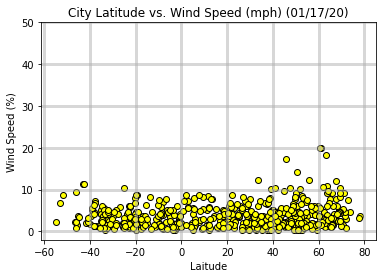

In [26]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather["Lat"], weather["Wind Speed"], facecolor = "yellow", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=3, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [27]:
northern_hemisphere = weather.loc[weather["Lat"] >= 0]
southern_hemisphere = weather.loc[weather["Lat"] < 0]

# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"Regression is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="white")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression is : -0.87


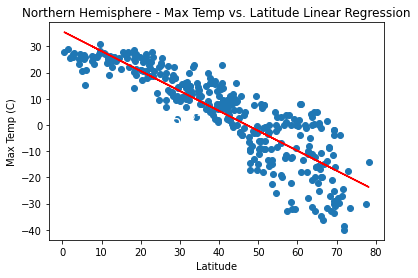

In [28]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])


annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression is : 0.58


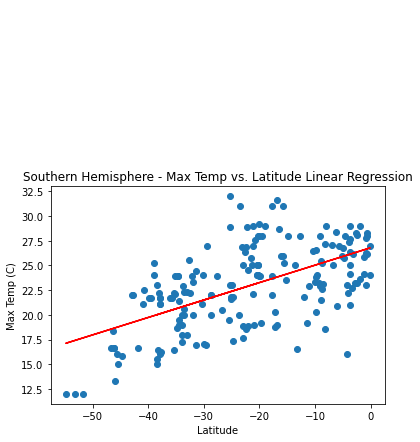

In [29]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression is : 0.28


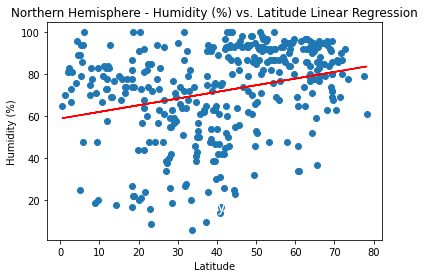

In [31]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression is : 0.37


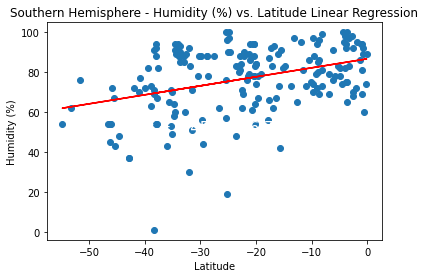

In [33]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression is : 0.38


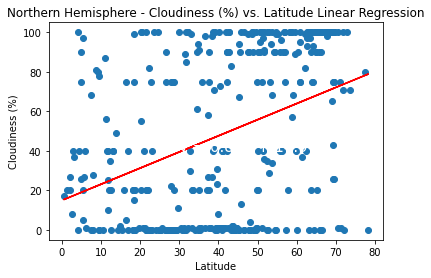

In [34]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression is : 0.13


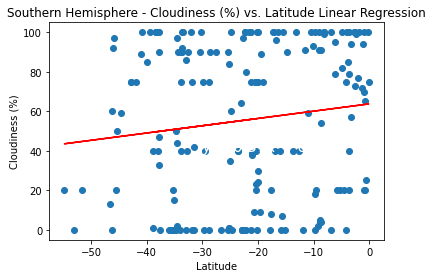

In [35]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression is : 0.11


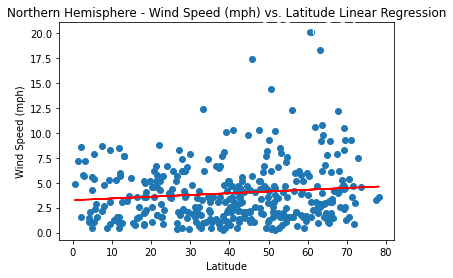

In [36]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression is : -0.2


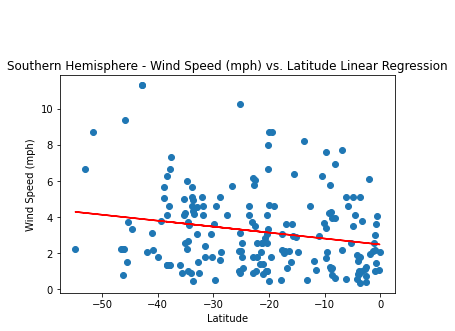

In [37]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

In [2]:
####Temperature has a clear correlation with latitude
####Weather grows significantly warmer the closer you get to the equator (0 Deg. Latitude). Southern hemisphere grows warmer this time of year than the northern hemisphere
####There is no strong relationship between latitude and cloudiness, but there are some clustering patterns the lesser the latitude
####There is no strong relationship between latitude and wind speed. Outliers at 20+mph in the Northern Hemisphere. Greatest mph in the Southern Hemisphere is a little over 10.
####There is no strong relationship between latitude and humidity